<a href="https://colab.research.google.com/github/rogabifs/IA048-Machine-Learning/blob/main/Atividade_1_IA048.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from itertools import chain
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from scipy.interpolate import interp1d
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

In [ ]:
df = pd.read_csv('/opt/air traffic.csv')
df

,Year,Month,Dom_Pax,Int_Pax,Pax,Dom_Flt,Int_Flt,Flt,Dom_RPM,Int_RPM,RPM,Dom_ASM,Int_ASM,ASM,Dom_LF,Int_LF,LF
0,2003,1,"43,032,450","4,905,830","47,938,280","785,160","57,667","842,827","36,211,422","12,885,980","49,097,402","56,191,300","17,968,572","74,159,872",64.44,71.71,66.20
1,2003,2,"41,166,780","4,245,366","45,412,146","690,351","51,259","741,610","34,148,439","10,715,468","44,863,907","50,088,434","15,587,880","65,676,314",68.18,68.74,68.31
2,2003,3,"49,992,700","5,008,613","55,001,313","797,194","58,926","856,120","41,774,564","12,567,068","54,341,633","57,592,901","17,753,174","75,346,075",72.53,70.79,72.12
3,2003,4,"47,033,260","4,345,444","51,378,704","766,260","55,005","821,265","39,465,980","10,370,592","49,836,572","54,639,679","15,528,761","70,168,440",72.23,66.78,71.02
4,2003,5,"49,152,352","4,610,834","53,763,186","789,397","55,265","844,662","41,001,934","11,575,026","52,576,960","55,349,897","15,629,821","70,979,718",74.08,74.06,74.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,2023,5,"71,423,653","10,358,666","81,782,319","667,331","71,924","739,255","66,743,565","26,805,432","93,548,998","77,821,407","31,950,687","109,772,094",85.77,83.90,85.22
245,2023,6,"72,482,621","11,544,505","84,027,126","661,293","75,279","736,572","68,789,127","29,883,465","98,672,591","78,058,358","33,410,671","111,469,028",88.13,89.44,88.52
246,2023,7,"75,378,157","12,432,615","87,810,772","684,939","79,738","764,677","72,267,904","31,376,000","103,643,904","81,986,010","35,326,191","117,312,202",88.15,88.82,88.35
247,2023,8,"71,477,988","11,572,149","83,050,137","691,482","77,137","768,619","67,933,484","29,938,507","97,871,992","81,997,399","34,908,793","116,906,192",82.85,85.76,83.72


In [ ]:
# @title Default title text
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Year     249 non-null    int64  
 1   Month    249 non-null    int64  
 2   Dom_Pax  249 non-null    object 
 3   Int_Pax  249 non-null    object 
 4   Pax      249 non-null    object 
 5   Dom_Flt  249 non-null    object 
 6   Int_Flt  249 non-null    object 
 7   Flt      249 non-null    object 
 8   Dom_RPM  249 non-null    object 
 9   Int_RPM  249 non-null    object 
 10  RPM      249 non-null    object 
 11  Dom_ASM  249 non-null    object 
 12  Int_ASM  249 non-null    object 
 13  ASM      249 non-null    object 
 14  Dom_LF   249 non-null    float64
 15  Int_LF   249 non-null    float64
 16  LF       249 non-null    float64
dtypes: float64(3), int64(2), object(12)
memory usage: 33.2+ KB


In [ ]:
df.describe()


,Year,Month,Dom_LF,Int_LF,LF
count,249.000000,249.000000,249.000000,249.000000,249.000000
mean,2012.879518,6.445783,79.938394,77.304940,79.286305
std,6.002817,3.442803,8.860562,10.907145,8.895700
min,2003.000000,1.000000,13.090000,23.150000,13.830000
25%,2008.000000,3.000000,77.720000,76.430000,76.940000
50%,2013.000000,6.000000,82.120000,79.910000,81.580000
75%,2018.000000,9.000000,85.240000,82.930000,84.070000
max,2023.000000,12.000000,89.960000,89.440000,89.140000


In [ ]:
duplicated_rows = df[df.duplicated()]

if not duplicated_rows.empty:
    print("There are duplicated rows.")
    print(duplicated_rows)
else:
    print("There are no duplicated rows.")

There are no duplicated rows.


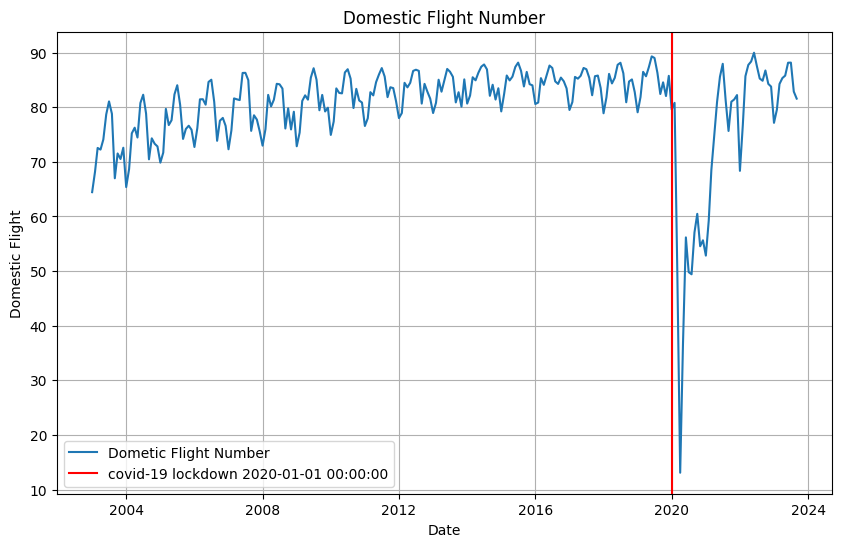

In [ ]:
df['date'] = pd.to_datetime(df[['Year', 'Month']].assign(DAY = 1))

#lockdown start date
lockdown_date = pd.Timestamp('2020-01-01')


#plot with matplotlib
plt.figure(figsize =(10,6))
plt.plot(df['date'],df['Dom_LF'], label ='Dometic Flight Number' )
plt.axvline(lockdown_date, color = 'r', label = f'covid-19 lockdown {lockdown_date}')
plt.title('Domestic Flight Number')
plt.xlabel('Date')
plt.ylabel('Domestic Flight')
plt.grid(True)
plt.legend()
plt.show()

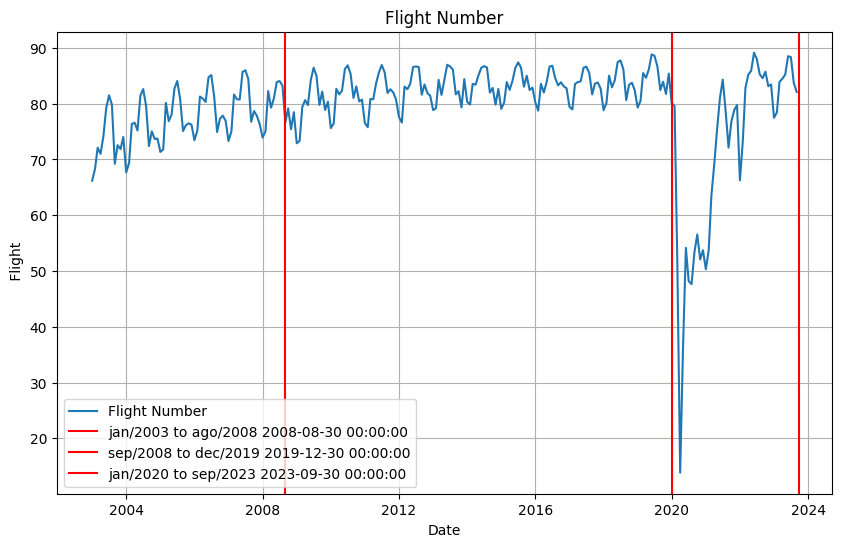

In [ ]:
df['date'] = pd.to_datetime(df[['Year', 'Month']].assign(DAY = 1))

#lockdown start date
jan2003_to_ago2008 = pd.Timestamp('2008-08-30')
sep2008_to_dec2019 = pd.Timestamp('2019-12-30')
jan2020_to_sep2023 = pd.Timestamp('2023-09-30')


#plot with matplotlib
plt.figure(figsize =(10,6))
plt.plot(df['date'],df['LF'], label ='Flight Number' )
plt.axvline(jan2003_to_ago2008, color = 'r', label = f'jan/2003 to ago/2008 {jan2003_to_ago2008}')
plt.axvline(sep2008_to_dec2019, color = 'r', label = f'sep/2008 to dec/2019 {sep2008_to_dec2019}')
plt.axvline(jan2020_to_sep2023, color = 'r', label = f'jan/2020 to sep/2023 {jan2020_to_sep2023}')
plt.title('Flight Number')
plt.xlabel('Date')
plt.ylabel(' Flight')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
df['time'] = (df.index.values + 0.5) / 12

In [ ]:
#Train for K values where K = 0,1,2,...,24 for each value
# Type 1 - Data of 2003 to 2019
df_normal_times = df[df['date'] < lockdown_date]
x_normal_times = list(df_normal_times['time'])
y_normal_times = list(df_normal_times['LF'])

matriz_de_erros = []
menor_erro = 10000
k_otimo = 0
coefficients_otimos = []
linear_otimo = 0

aux = 0
aux_otimo = 0


for i in range(0,len(y_normal_times)):
  matriz_de_erros.append(RMSE_linear)
  if i > 24:
    for k in range(1,25):
      # Divide data into traning and test data
      train_size = k
      test_size = len(x_normal_times) - k

      # Data in train
      x_train = x_normal_times[0:train_size]
      y_train = y_normal_times[0:train_size]

      # Data test
      x_test = x_normal_times[train_size:]
      y_test = y_normal_times[train_size:]

      LF_test = df_normal_times.iloc[train_size:].copy()
      LF_train = df_normal_times.iloc[0:train_size].copy()

      # Fit model data with training data
      model_1 = LinearRegression().fit(np.array(x_train).reshape(-1,1), y_train)
      coefficients = [model_1.coef_[0], model_1.intercept_]
      linear = model_1.predict(np.array(x_train).reshape(-1,1))

      # Calculate performance metrics for Linear Model
      linear_test = model_1.predict(np.array(x_test).reshape(-1, 1))
      RMSE_linear = (mean_squared_error(y_test, linear_test ,squared=False))

      if RMSE_linear < menor_erro:
        menor_erro = RMSE_linear
        k_otimo = k
        coefficients_otimos.insert(0, coefficients[0])
        coefficients_otimos.insert(1, coefficients[1])
        linear_otimo = linear
        aux_otimo = i
  else:
    for k in range(1, i):
      # Divide data into traning and test data
      train_size = k
      test_size = len(x_normal_times) - k

      # Data in train
      x_train = x_normal_times[0:train_size]
      y_train = y_normal_times[0:train_size]

      # Data test
      x_test = x_normal_times[train_size:]
      y_test = y_normal_times[train_size:]

      LF_test = df_normal_times.iloc[train_size:].copy()
      LF_train = df_normal_times.iloc[0:train_size].copy()

      # Fit model data with training data
      model_1 = LinearRegression().fit(np.array(x_train).reshape(-1,1), y_train)
      coefficients = [model_1.coef_[0], model_1.intercept_]
      linear = model_1.predict(np.array(x_train).reshape(-1,1))

      # Calculate performance metrics for Linear Model
      linear_test = model_1.predict(np.array(x_test).reshape(-1, 1))
      RMSE_linear = (mean_squared_error(y_test, linear_test ,squared=False))


      if RMSE_linear < menor_erro:
        menor_erro = RMSE_linear
        k_otimo = k
        coefficients_otimos.insert(0, coefficients[0])
        coefficients_otimos.insert(1, coefficients[1])
        linear_otimo = linear
        aux_otimo = i







In [ ]:
#Train for K values where K = 0,1,2,...,24 for each value
# Type 1 - Data of 2003 to 2019
df_normal_times = df[df['date'] < lockdown_date]
x_normal_times = list(df_normal_times['time'])
y_normal_times = list(df_normal_times['LF'])

matriz_de_erros = []
menor_erro = 10000
k_otimo = 0
coefficients_otimos = []
linear_otimo = 0

aux = 0
aux_otimo = 0


for i in range(0,len(y_normal_times)):
  matriz_de_erros.append(RMSE_linear)
  if i > 24:
    for k in range(1,25):
      # Divide data into traning and test data
      train_size = k
      test_size = len(x_normal_times) - k

      # Data in train
      x_train = x_normal_times[0:train_size]
      y_train = y_normal_times[0:train_size]

      # Data test
      x_test = x_normal_times[train_size:]
      y_test = y_normal_times[train_size:]

      LF_test = df_normal_times.iloc[train_size:].copy()
      LF_train = df_normal_times.iloc[0:train_size].copy()

      # Fit model data with training data
      model_1 = LinearRegression().fit(np.array(x_train).reshape(-1,1), y_train)
      coefficients = [model_1.coef_[0], model_1.intercept_]
      linear = model_1.predict(np.array(x_train).reshape(-1,1))

      # Calculate performance metrics for Linear Model
      linear_test = model_1.predict(np.array(x_test).reshape(-1, 1))
      RMSE_linear = (mean_squared_error(y_test, linear_test ,squared=False))

      if RMSE_linear < menor_erro:
        menor_erro = RMSE_linear
        k_otimo = k
        coefficients_otimos.insert(0, coefficients[0])
        coefficients_otimos.insert(1, coefficients[1])
        linear_otimo = linear
        aux_otimo = i
  else:
    for k in range(1, i):
      # Divide data into traning and test data
      train_size = k
      test_size = len(x_normal_times) - k

      # Data in train
      x_train = x_normal_times[0:train_size]
      y_train = y_normal_times[0:train_size]

      # Data test
      x_test = x_normal_times[train_size:]
      y_test = y_normal_times[train_size:]

      LF_test = df_normal_times.iloc[train_size:].copy()
      LF_train = df_normal_times.iloc[0:train_size].copy()

      # Fit model data with training data
      model_1 = LinearRegression().fit(np.array(x_train).reshape(-1,1), y_train)
      coefficients = [model_1.coef_[0], model_1.intercept_]
      linear = model_1.predict(np.array(x_train).reshape(-1,1))

      # Calculate performance metrics for Linear Model
      linear_test = model_1.predict(np.array(x_test).reshape(-1, 1))
      RMSE_linear = (mean_squared_error(y_test, linear_test ,squared=False))


      if RMSE_linear < menor_erro:
        menor_erro = RMSE_linear
        k_otimo = k
        coefficients_otimos.insert(0, coefficients[0])
        coefficients_otimos.insert(1, coefficients[1])
        linear_otimo = linear
        aux_otimo = i







The linear model is F(t) = 0.482*t + 72.361 


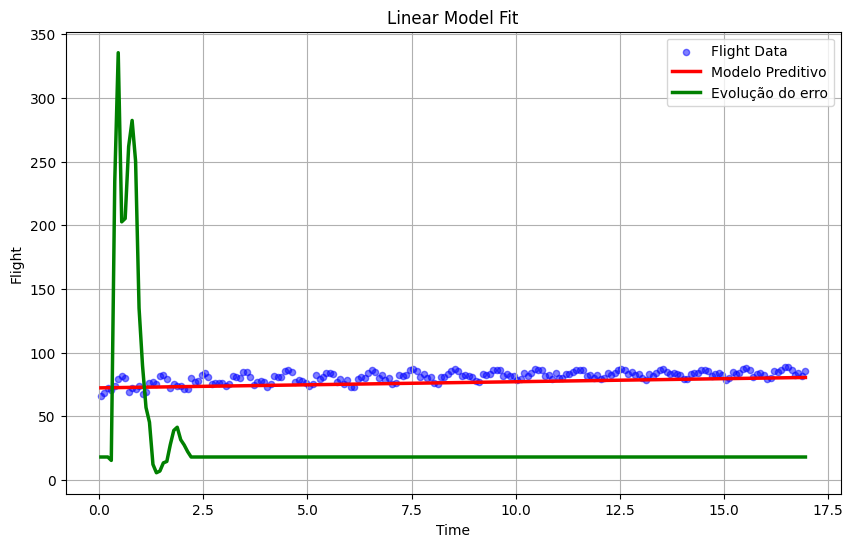

In [ ]:
print("The linear model is F(t) = {:.3f}*t + {:.3f} ".format(coefficients_otimos[0],coefficients_otimos[1]))
def f(x_normal_times): return np.float64(coefficients_otimos[0])*np.float64(x_normal_times) + np.float64(coefficients_otimos[1])

# plot data with matplotlib
plt.figure(figsize=(10, 6))
plt.scatter(x_normal_times, y_normal_times, s=20, c="blue", alpha=0.5, label="Flight Data")
plt.plot(x_normal_times, f(x_normal_times), color="red", linewidth=2.5, label="Modelo Preditivo")
plt.plot(x_normal_times, matriz_de_erros,color="green", linewidth=2.5, label="Evolução do erro")
plt.xlabel('Time')
plt.ylabel('Flight')
plt.title('Linear Model Fit')
plt.legend()
plt.grid(True)
plt.show()

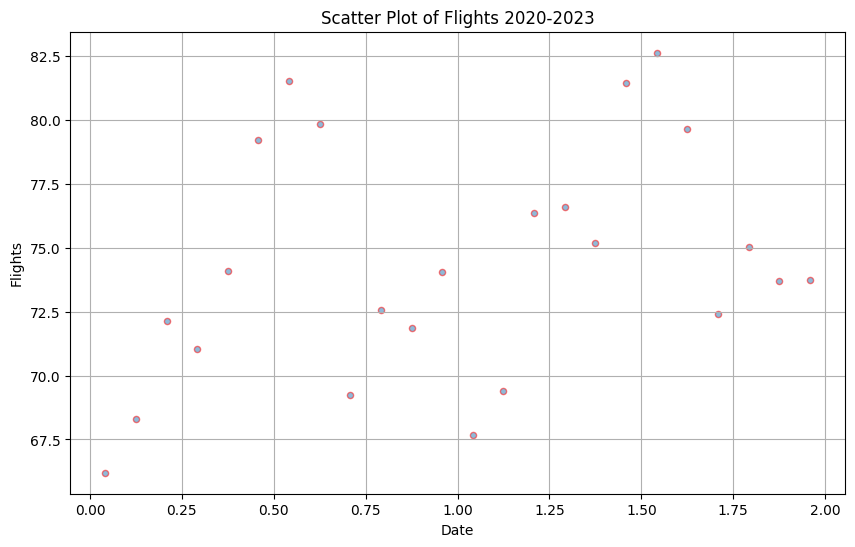

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(x_train, y_train, s=20, alpha=0.5, edgecolors="red")
plt.xlabel('Date')
plt.ylabel('Flights')
plt.title('Scatter Plot of Flights 2020-2023')
plt.grid(True)
plt.show()

In [ ]:
df_pandemic_times = df[df['date'] > lockdown_date]
x_pandemic_times = list(df_pandemic_times['time'])
y_pandemic_times = list(df_pandemic_times['LF'])

matriz_de_erros = []
menor_erro = 10000
k_otimo = 0
coefficients_otimos = []
linear_otimo = 0

aux = 0
aux_otimo = 0


for i in range(0,len(y_pandemic_times)):
  matriz_de_erros.append(RMSE_linear)
  if i > 24:
    for k in range(1,25):
      # Divide data into traning and test data
      train_size = k
      validate_size = len(x_pandemic_times) - k

      # Data in train
      x_train = x_pandemic_times[0:train_size]
      y_train = y_pandemic_times[0:train_size]

      # Data validate
      x_validate = x_pandemic_times[train_size:]
      y_validate = y_pandemic_times[train_size:]

      LF_validate = df_normal_times.iloc[train_size:].copy()
      LF_train = df_normal_times.iloc[0:train_size].copy()

      # Fit model data with training data
      model_1 = LinearRegression().fit(np.array(x_train).reshape(-1,1), y_train)
      coefficients = [model_1.coef_[0], model_1.intercept_]
      linear = model_1.predict(np.array(x_train).reshape(-1,1))

      # Calculate performance metrics for Linear Model
      linear_test = model_1.predict(np.array(x_validate).reshape(-1, 1))
      RMSE_linear = (mean_squared_error(y_validate, linear_test ,squared=False))

      if RMSE_linear < menor_erro:
        menor_erro = RMSE_linear
        k_otimo = k
        coefficients_otimos.insert(0, coefficients[0])
        coefficients_otimos.insert(1, coefficients[1])
        linear_otimo = linear
        aux_otimo = i
  else:
    for k in range(1, i):
      # Divide data into traning and test data
      train_size = k
      validate_size = len(x_normal_times) - k

      # Data in train
      x_train = x_pandemic_times[0:train_size]
      y_train = y_pandemic_times[0:train_size]

      # Data test
      x_test = x_pandemic_times[train_size:]
      y_test = y_pandemic_times[train_size:]

      LF_test = df_pandemic_times.iloc[train_size:].copy()
      LF_train = df_pandemic_times.iloc[0:train_size].copy()

      # Fit model data with training data
      model_1 = LinearRegression().fit(np.array(x_train).reshape(-1,1), y_train)
      coefficients = [model_1.coef_[0], model_1.intercept_]
      linear = model_1.predict(np.array(x_train).reshape(-1,1))

      # Calculate performance metrics for Linear Model
      linear_test = model_1.predict(np.array(x_test).reshape(-1, 1))
      RMSE_linear = (mean_squared_error(y_test, linear_test ,squared=False))


      if RMSE_linear < menor_erro:
        menor_erro = RMSE_linear
        k_otimo = k
        coefficients_otimos.insert(0, coefficients[0])
        coefficients_otimos.insert(1, coefficients[1])
        linear_otimo = linear
        aux_otimo = i

The linear model is F(t) = 15.613*t + -223.443 


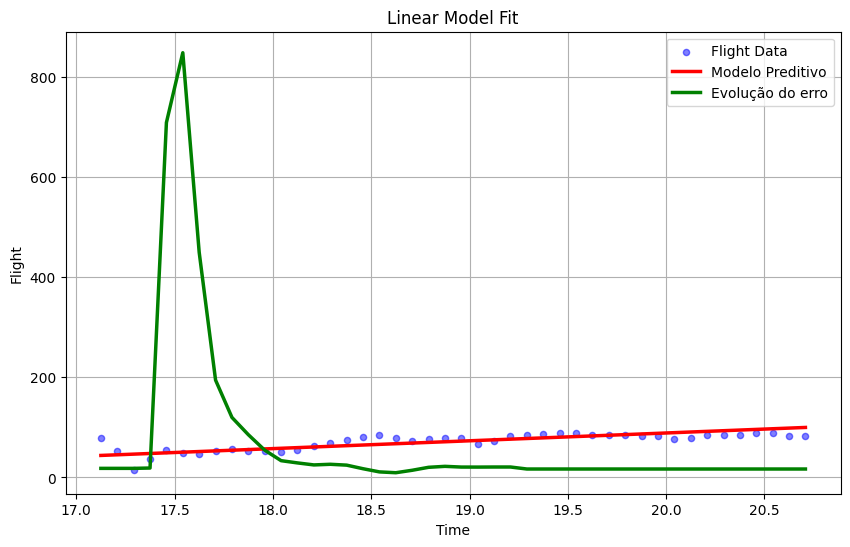

In [ ]:
print("The linear model is F(t) = {:.3f}*t + {:.3f} ".format(coefficients_otimos[0],coefficients_otimos[1]))
def f(x_pandemic_times): return np.float64(coefficients_otimos[0])*np.float64(x_pandemic_times) + np.float64(coefficients_otimos[1])



# plot data with matplotlib
plt.figure(figsize=(10, 6))
plt.scatter(x_pandemic_times, y_pandemic_times, s=20, c="blue", alpha=0.5, label="Flight Data")
plt.plot(x_pandemic_times, f(x_pandemic_times), color="red", linewidth=2.5, label="Modelo Preditivo")
plt.plot(x_pandemic_times, matriz_de_erros,color="green", linewidth=2.5, label="Evolução do erro")
plt.xlabel('Time')
plt.ylabel('Flight')
plt.title('Linear Model Fit')
plt.legend()
plt.grid(True)
plt.show()

The linear model is F(t) = 15.613*t + -223.443 
RMSE of linear model:8.683
MAPE of linear model:0.089 %


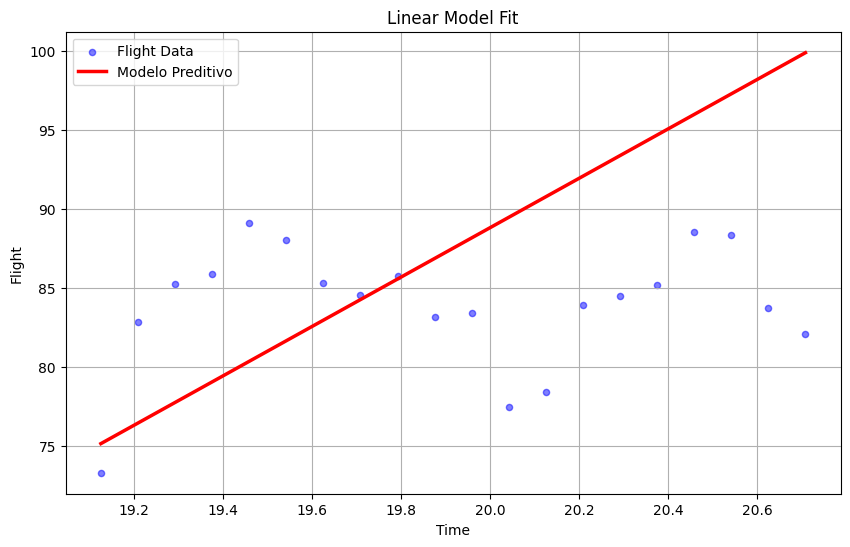

In [ ]:
print("The linear model is F(t) = {:.3f}*t + {:.3f} ".format(coefficients_otimos[0],coefficients_otimos[1]))
def f(x_test): return np.float64(coefficients_otimos[0])*np.float64(x_test) + np.float64(coefficients_otimos[1])

# Calculate performance metrics for Linear Model
RMSE_linear = (mean_squared_error(y_test, f(x_test) ,squared=False))
MAPE_linear = mean_absolute_percentage_error(y_test, f(x_test))
print("RMSE of linear model:{:.3f}".format(RMSE_linear))
print("MAPE of linear model:{:.3f} %".format(MAPE_linear))

# plot data with matplotlib
plt.figure(figsize=(10, 6))
plt.scatter(x_test, y_test, s=20, c="blue", alpha=0.5, label="Flight Data")
plt.plot(x_test, f(x_test), color="red", linewidth=2.5, label="Modelo Preditivo")
# plt.plot(x_test, matriz_de_erros,color="green", linewidth=2.5, label="Evolução do erro")
plt.xlabel('Time')
plt.ylabel('Flight')
plt.title('Linear Model Fit')
plt.legend()
plt.grid(True)
plt.show()

21
RMSE of linear model:8.634
MAPE of linear model:0.090 %


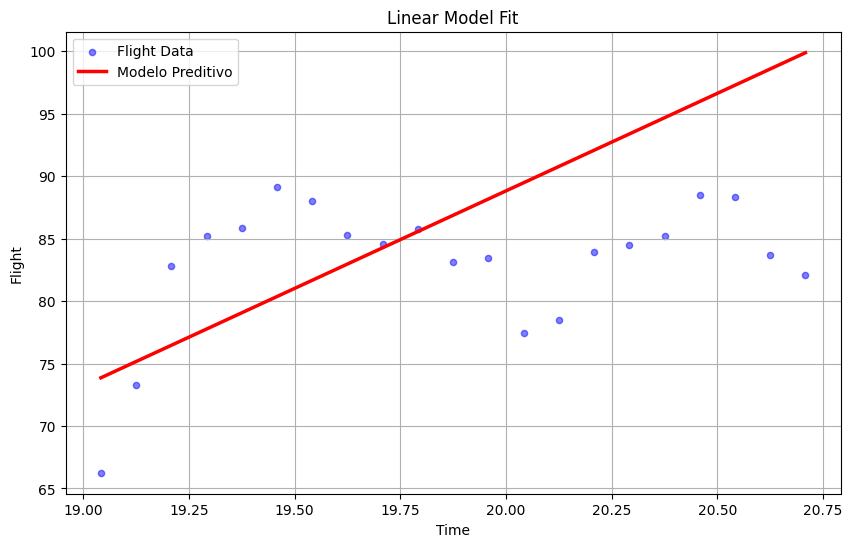

In [ ]:
min_date = pd.Timestamp('2022-01-01')
df_min_date = df[df["date"] >= min_date]
x = list(df_min_date['time'])
y = list(df_min_date['LF'])

print(len(x))
def f(x): return np.float64(coefficients_otimos[0])*np.float64(x) + np.float64(coefficients_otimos[1])

# Calculate performance metrics for Linear Model
RMSE_linear = (mean_squared_error(y, f(x) ,squared=False))
MAPE_linear = mean_absolute_percentage_error(y, f(x))
print("RMSE of linear model:{:.3f}".format(RMSE_linear))
print("MAPE of linear model:{:.3f} %".format(MAPE_linear))

# plot data with matplotlib
plt.figure(figsize=(10, 6))
plt.scatter(x, y, s=20, c="blue", alpha=0.5, label="Flight Data")
plt.plot(x, f(x), color="red", linewidth=2.5, label="Modelo Preditivo")
# plt.plot(x_test, matriz_de_erros,color="green", linewidth=2.5, label="Evolução do erro")
plt.xlabel('Time')
plt.ylabel('Flight')
plt.title('Linear Model Fit')
plt.legend()
plt.grid(True)
plt.show()

Letra C)

In [ ]:
date_of_test_init = pd.Timestamp('2020-01-01')
date_of_test_end = pd.Timestamp('2022-01-01')

# Divide data into traning, validate data and test data
df_train_data = df[df['date'] < date_of_test_init]
x_train_data = list(df_train_data['time'])
y_train_data = list(df_train_data['LF'])
LF_train = df_train_data.iloc[::].copy()

df_validatate_data = df[df['date'].between(date_of_test_init, date_of_test_end)]
x_validatate_data = list(df_validatate_data['time'])
y_validatate_data = list(df_validatate_data['LF'])
LF_validate = df_validatate_data.iloc[::].copy()

df_test_data = df[df['date'] > date_of_test_end]
x_test_data = list(df_test_data['time'])
y_test_data = list(df_test_data['LF'])
LF_test = df_test_data.iloc[::].copy()


model = LinearRegression().fit(np.array(x_train_data).reshape(-1,1), y_train_data)
coefficients = [model.coef_[0], model.intercept_]


#Train for K values where K = 0,1,2,...,24 for each value
matriz_de_erros = []
menor_erro = 10000
k_otimo = 0
coefficients_otimos = []
linear_otimo = 0

aux = 0
aux_otimo = 0


for i in range(0,len(y_train_data)):
  matriz_de_erros.append(RMSE_linear)
  if i > 24:
    for k in range(1,25):
      # Divide data into traning and test data
      train_size = k
      test_size = len(x_train_data) - k

      # Data in train
      x_train = x_train_data[0:train_size]
      y_train = y_train_data[0:train_size]

      # Data test
      x_validate = x_validatate_data[train_size:]
      y_validate = y_validatate_data[train_size:]

      LF_test = df_validatate_data.iloc[train_size:].copy()
      LF_validate = df_validatate_data.iloc[0:train_size].copy()

      # Fit model data with training data
      model = LinearRegression().fit(np.array(x_train).reshape(-1,1), y_train)
      coefficients = [model.coef_[0], model.intercept_]
      linear = model_1.predict(np.array(x_train).reshape(-1,1))

      def f(x_validate): return coefficients[0]*np.float64(x_validate) + coefficients[1]
      # Calculate performance metrics for Linear Model
      RMSE_linear = (mean_squared_error(y_validate, f(x_validate) ,squared=False))

      if RMSE_linear < menor_erro:
        menor_erro = RMSE_linear
        k_otimo = k
        coefficients_otimos.insert(0, coefficients[0])
        coefficients_otimos.insert(1, coefficients[1])
        linear_otimo = linear
        aux_otimo = i
  else:
    for k in range(1, i):
     # Divide data into traning and test data
      train_size = k
      test_size = len(x_train_data) - k

      # Data in train
      x_train = x_train_data[0:train_size]
      y_train = y_train_data[0:train_size]

      # Data test
      x_validate = x_validatate_data[train_size:]
      y_validate = y_validatate_data[train_size:]

      LF_test = df_validatate_data.iloc[train_size:].copy()
      LF_validate = df_validatate_data.iloc[0:train_size].copy()

      # Fit model data with training data
      model = LinearRegression().fit(np.array(x_train).reshape(-1,1), y_train)
      coefficients = [model.coef_[0], model.intercept_]
      linear = model.predict(np.array(x_train).reshape(-1,1))

      # Calculate performance metrics for Linear Model
      def f(x_validate): return coefficients[0]*np.float64(x_validate) + coefficients[1]
      RMSE_linear = (mean_squared_error(y_validate, f(x_validate),squared=False))

      if RMSE_linear < menor_erro:
        menor_erro = RMSE_linear
        k_otimo = k
        coefficients_otimos.insert(0, coefficients[0])
        coefficients_otimos.insert(1, coefficients[1])
        linear_otimo = linear
        aux_otimo = i

print(coefficients_otimos[0], coefficients_otimos[1])







0.481582417582416 72.36050549450549


The linear model is F(t) = 0.482*t + 72.361 


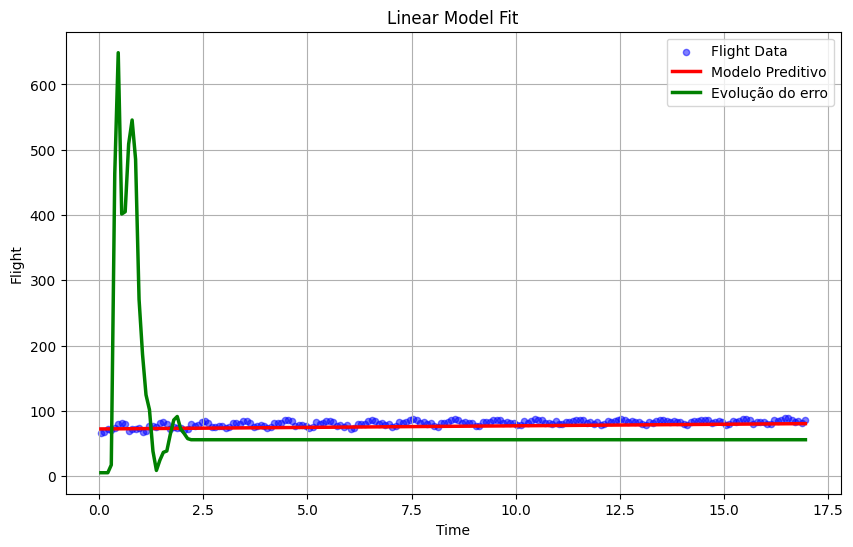

In [ ]:
print("The linear model is F(t) = {:.3f}*t + {:.3f} ".format(coefficients_otimos[0],coefficients_otimos[1]))
def f(x_normal_times): return np.float64(coefficients_otimos[0])*np.float64(x_normal_times) + np.float64(coefficients_otimos[1])

# plot data with matplotlib
plt.figure(figsize=(10, 6))
plt.scatter(x_normal_times, y_normal_times, s=20, c="blue", alpha=0.5, label="Flight Data")
plt.plot(x_normal_times, f(x_normal_times), color="red", linewidth=2.5, label="Modelo Preditivo")
plt.plot(x_normal_times, matriz_de_erros,color="green", linewidth=2.5, label="Evolução do erro")
plt.xlabel('Time')
plt.ylabel('Flight')
plt.title('Linear Model Fit')
plt.legend()
plt.grid(True)
plt.show()

The linear model is F(t) = 0.482*t + 72.361 
RMSE of linear model:4.256
MAPE of linear model:0.044 %


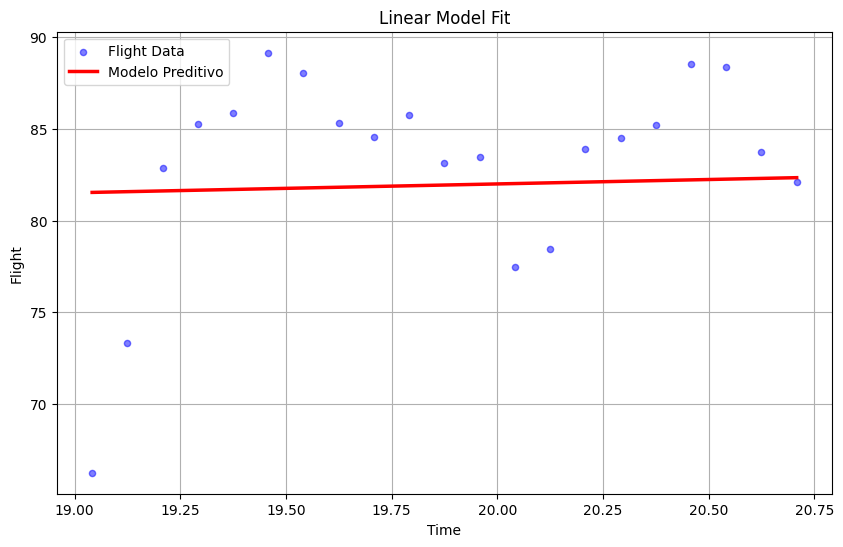

In [ ]:
def f(x_test_data): return np.float64(coefficients_otimos[0])*np.float64(x_test_data) + np.float64(coefficients_otimos[1])
print("The linear model is F(t) = {:.3f}*t + {:.3f} ".format(coefficients_otimos[0],coefficients_otimos[1]))

# Calculate performance metrics for Linear Model
RMSE_linear = (mean_squared_error(y_test_data, f(x_test_data) ,squared=False))
MAPE_linear = mean_absolute_percentage_error(y_test_data, f(x_test_data))
print("RMSE of linear model:{:.3f}".format(RMSE_linear))
print("MAPE of linear model:{:.3f} %".format(MAPE_linear))

# plot data with matplotlib
plt.figure(figsize=(10, 6))
plt.scatter(x, y, s=20, c="blue", alpha=0.5, label="Flight Data")
plt.plot(x, f(x), color="red", linewidth=2.5, label="Modelo Preditivo")
# plt.plot(x_test, matriz_de_erros,color="green", linewidth=2.5, label="Evolução do erro")
plt.xlabel('Time')
plt.ylabel('Flight')
plt.title('Linear Model Fit')
plt.legend()
plt.grid(True)
plt.show()

21
RMSE of linear model:5.325
MAPE of linear model:0.052 %


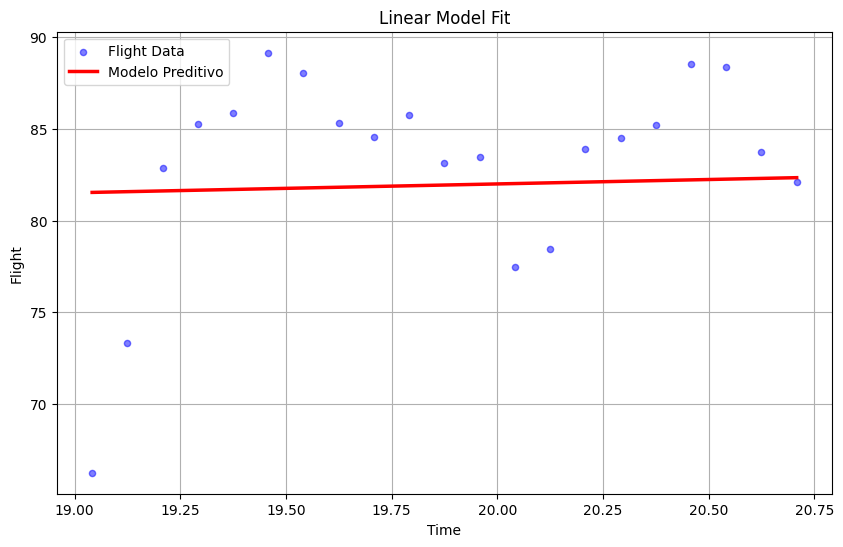

In [ ]:
min_date = pd.Timestamp('2022-01-01')
df_min_date = df[df["date"] >= min_date]
x = list(df_min_date['time'])
y = list(df_min_date['LF'])

print(len(x))
def f(x): return np.float64(coefficients_otimos[0])*np.float64(x) + np.float64(coefficients_otimos[1])

# Calculate performance metrics for Linear Model
RMSE_linear = (mean_squared_error(y, f(x) ,squared=False))
MAPE_linear = mean_absolute_percentage_error(y, f(x))
print("RMSE of linear model:{:.3f}".format(RMSE_linear))
print("MAPE of linear model:{:.3f} %".format(MAPE_linear))

# plot data with matplotlib
plt.figure(figsize=(10, 6))
plt.scatter(x, y, s=20, c="blue", alpha=0.5, label="Flight Data")
plt.plot(x, f(x), color="red", linewidth=2.5, label="Modelo Preditivo")
# plt.plot(x_test, matriz_de_erros,color="green", linewidth=2.5, label="Evolução do erro")
plt.xlabel('Time')
plt.ylabel('Flight')
plt.title('Linear Model Fit')
plt.legend()
plt.grid(True)
plt.show()